# Scatterplots

In [9]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from matplotlib.ticker import FuncFormatter
from shapely.geometry import Polygon, Point

The model data is imported as a dataset:

In [10]:
temp = xr.open_dataset("/students_files/data/slo0043_echam6_code167_mm_1001_8850.ncslo0043_echam6_code167_mm_1001_8850.nc")
large_scale_prec = xr.open_dataset("/students_files/data/slo0043_echam6_code142_mm_1001_8850.ncslo0043_echam6_code142_mm_1001_8850.nc")
convective_prec = xr.open_dataset("/students_files/data/slo0043_echam6_code143_mm_1001_8850.ncslo0043_echam6_code143_mm_1001_8850.nc")
sum_var = large_scale_prec['var142'] + convective_prec['var143']
prec = xr.Dataset({'var260': sum_var})
prec = prec.assign_coords(coords=large_scale_prec.coords)

The longitude and latitude coordinates are adjusted.

In [11]:
# adjust values of lon and lat and show dataset

def adjust_lon_lat(ds, lon_name, lat_name, reverse = False):
    """Adjusts longitude from 0 to 360 to -180 to 180 and reverses latitude."""
    if reverse == True:
        ds = ds.reindex({lat_name:ds[lat_name][::-1]})
    ds['_longitude_adjusted'] = xr.where(
        ds[lon_name] > 180,
        ds[lon_name] - 360,
        ds[lon_name])
    ds = (ds
          .swap_dims({lon_name: '_longitude_adjusted'})
          .sel(**{'_longitude_adjusted': sorted(ds._longitude_adjusted)})
          .drop(lon_name))
    ds = ds.rename({'_longitude_adjusted': lon_name})
    return ds

temp = adjust_lon_lat(temp, lon_name="lon", lat_name="lat", reverse=True)
prec = adjust_lon_lat(prec, lon_name="lon", lat_name="lat", reverse=True)

Creating a Baltic Sea drainage basin boolean mask: (3mask)

In [12]:
corner_points = [
    (18.0, 49),
    (23.0, 49),
    (28.0, 55.0),
    (32.0, 56.0),
    (35.0, 62.0),
    (30.0, 62.0),
    (29.0, 67.0),
    (19.0, 68.0),
    (12.0, 61.0),
    (12.0, 57.5),
    (8.0, 56.5),
    (10.0, 53.0),
    (13.5, 52.5)
]

polygon = Polygon(corner_points)

lat_mask = (temp['lat'] >= polygon.bounds[1]) & (temp['lat'] <= polygon.bounds[3])
lon_mask = (temp['lon'] >= polygon.bounds[0]) & (temp['lon'] <= polygon.bounds[2])
mask = (lat_mask & lon_mask)

lat_values = temp['lat'].values
lon_values = temp['lon'].values
for i in range(len(lat_values)):
    for j in range(len(lon_values)):
        if not polygon.contains(Point(lon_values[j], lat_values[i])):
            mask[i, j] = False
            
            
mask_sea = xr.zeros_like(mask, dtype=bool)
mask_sea[77,100] = True;
mask_sea[77,101] = True;
mask_sea[77,102] = True;
mask_sea[77,103] = True;
mask_sea[77,104] = True;
mask_sea[77,105] = True;
mask_sea[77,106] = True;
mask_sea[78,101] = True;
mask_sea[78,104] = True;
mask_sea[78,105] = True;
mask_sea[78,106] = True;
mask_sea[79,104] = True;
mask_sea[79,105] = True;
mask_sea[79,106] = True;
mask_sea[79,107] = True;
mask_sea[79,108] = True;
mask_sea[80,104] = True;
mask_sea[80,105] = True;
mask_sea[80,106] = True;
mask_sea[80,107] = True;
mask_sea[80,109] = True;
mask_sea[80,110] = True;
mask_sea[81,105] = True;
mask_sea[81,106] = True;
mask_sea[81,107] = True;
mask_sea[82,106] = True;
mask_sea[82,107] = True;
mask_sea[82,108] = True;


mask_land_s = xr.zeros_like(mask, dtype=bool)
mask_land_s[74,105] = True;
mask_land_s[74,106] = True;
mask_land_s[74,107] = True;
mask_land_s[75,104] = True;
mask_land_s[75,105] = True;
mask_land_s[75,106] = True;
mask_land_s[75,107] = True;
mask_land_s[75,108] = True;
mask_land_s[76,101] = True;
mask_land_s[76,102] = True;
mask_land_s[76,103] = True;
mask_land_s[76,104] = True;
mask_land_s[76,105] = True;
mask_land_s[76,106] = True;
mask_land_s[76,107] = True;
mask_land_s[76,108] = True;
mask_land_s[76,109] = True;
mask_land_s[77,107] = True;
mask_land_s[77,108] = True;
mask_land_s[77,109] = True;
mask_land_s[78,102] = True;
mask_land_s[78,103] = True;
mask_land_s[78,107] = True;
mask_land_s[78,108] = True;
mask_land_s[78,109] = True;
mask_land_s[78,110] = True;
mask_land_s[78,111] = True;
mask_land_s[78,112] = True;
mask_land_s[79,102] = True;
mask_land_s[79,103] = True;
mask_land_s[79,109] = True;
mask_land_s[79,110] = True;
mask_land_s[79,111] = True;
mask_land_s[79,112] = True;


mask_land_n = xr.zeros_like(mask, dtype=bool)
mask_land_n[80,102] = True;
mask_land_n[80,103] = True;
mask_land_n[80,104] = True;
mask_land_n[80,108] = True;
mask_land_n[80,111] = True;
mask_land_n[80,112] = True;
mask_land_n[80,113] = True;
mask_land_n[81,103] = True;
mask_land_n[81,104] = True;
mask_land_n[81,107] = True;
mask_land_n[81,108] = True;
mask_land_n[81,109] = True;
mask_land_n[81,110] = True;
mask_land_n[82,104] = True;
mask_land_n[82,105] = True;
mask_land_n[82,109] = True;
mask_land_n[82,110] = True;
mask_land_n[83,105] = True;
mask_land_n[83,106] = True;
mask_land_n[83,107] = True;
mask_land_n[83,108] = True;
mask_land_n[83,109] = True;
mask_land_n[83,110] = True;

Calculate the needed seasonal temp and prec values:

In [13]:
mean_temp_baltic = temp.where(mask).mean(dim=['lat', 'lon'])
mean_prec_baltic = prec.where(mask).mean(dim=['lat', 'lon'])
mean_prec_baltic = mean_prec_baltic * 86400

In [20]:
c_spring_bs = np.corrcoef(mean_temp_baltic['var167'], mean_prec_baltic['var260'])[0,1]
print(f"GENERELL:    {c_spring_bs:.4f}")
c_summer_bs = np.corrcoef(mean_temp_land_n['var167'], mean_prec_land_n['var260'])[0,1]
print(f"LN:   {c_summer_bs:.4f}")
c_fall_bs = np.corrcoef(mean_temp_land_s['var167'], mean_prec_land_s['var260'])[0,1]
print(f"LS:   {c_fall_bs:.4f}")
c_winter_bs = np.corrcoef(mean_temp_sea['var167'], mean_prec_sea['var260'])[0,1]
print(f"BS:   {c_winter_bs:.4f}")

GENERELL:    0.4495
LN:   0.6150
LS:   0.4380
BS:   0.1192


In [14]:
mean_temp_sea = temp.where(mask_sea).mean(dim=['lat', 'lon'])
mean_temp_land_n = temp.where(mask_land_n).mean(dim=['lat', 'lon'])
mean_temp_land_s = temp.where(mask_land_s).mean(dim=['lat', 'lon'])

In [15]:
mean_prec_sea = prec.where(mask_sea).mean(dim=['lat', 'lon'])
mean_prec_sea = mean_prec_sea * 86400
mean_prec_land_n = prec.where(mask_land_n).mean(dim=['lat', 'lon'])
mean_prec_land_n = mean_prec_land_n * 86400
mean_prec_land_s = prec.where(mask_land_s).mean(dim=['lat', 'lon'])
mean_prec_land_s = mean_prec_land_s * 86400

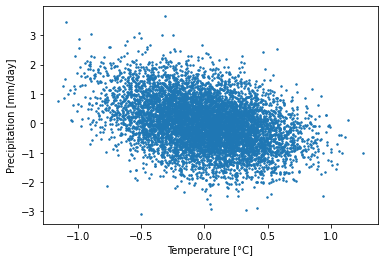

In [48]:
plt.plot(summer_mean_prec_bs, summer_mean_temp_bs, '.', markersize=3)
plt.xlabel('Temperature [°C]')
plt.ylabel('Precipitation [mm/day]')
plt.show()

Seasonal temp for 3map:

In [47]:
#bs
rolling_data = mean_temp_sea.isel(time=slice(2, None))
rolling_data = rolling_data['var167'].rolling(time=3, center=False, min_periods=3).mean()
rolling_data = rolling_data[2::3]
seasonal_mean_temp_bs = xr.Dataset({"var167": ("time", rolling_data)}, coords={"time": rolling_data.coords["time"]})

spring_mean_temp_bs = seasonal_mean_temp_bs['var167'][0::4]
t_mean = spring_mean_temp_bs.mean(dim=['time'])
t_mean = float(t_mean.values)
spring_mean_temp_bs -= t_mean
spring_mean_temp_bs.coords['time'] = range(-6000, -6000+len(spring_mean_temp_bs))

summer_mean_temp_bs = seasonal_mean_temp_bs['var167'][1::4]
t_mean = summer_mean_temp_bs.mean(dim=['time'])
t_mean = float(t_mean.values)
summer_mean_temp_bs -= t_mean
summer_mean_temp_bs.coords['time'] = range(-6000, -6000+len(summer_mean_temp_bs))

fall_mean_temp_bs = seasonal_mean_temp_bs['var167'][2::4]
t_mean = fall_mean_temp_bs.mean(dim=['time'])
t_mean = float(t_mean.values)
fall_mean_temp_bs -= t_mean
fall_mean_temp_bs.coords['time'] = range(-6000, -6000+len(fall_mean_temp_bs))

winter_mean_temp_bs = seasonal_mean_temp_bs['var167'][3::4]
t_mean = winter_mean_temp_bs.mean(dim=['time'])
t_mean = float(t_mean.values)
winter_mean_temp_bs -= t_mean
winter_mean_temp_bs.coords['time'] = range(-6000, -6000+len(winter_mean_temp_bs))


#ln
rolling_data = mean_temp_land_n.isel(time=slice(2, None))
rolling_data = rolling_data['var167'].rolling(time=3, center=False, min_periods=3).mean()
rolling_data = rolling_data[2::3]
seasonal_mean_temp_ln = xr.Dataset({"var167": ("time", rolling_data)}, coords={"time": rolling_data.coords["time"]})

spring_mean_temp_ln = seasonal_mean_temp_ln['var167'][0::4]
t_mean = spring_mean_temp_ln.mean(dim=['time'])
t_mean = float(t_mean.values)
spring_mean_temp_ln -= t_mean
spring_mean_temp_ln.coords['time'] = range(-6000, -6000+len(spring_mean_temp_ln))

summer_mean_temp_ln = seasonal_mean_temp_ln['var167'][1::4]
t_mean = summer_mean_temp_ln.mean(dim=['time'])
t_mean = float(t_mean.values)
summer_mean_temp_ln -= t_mean
summer_mean_temp_ln.coords['time'] = range(-6000, -6000+len(summer_mean_temp_ln))

fall_mean_temp_ln = seasonal_mean_temp_ln['var167'][2::4]
t_mean = fall_mean_temp_ln.mean(dim=['time'])
t_mean = float(t_mean.values)
fall_mean_temp_ln -= t_mean
fall_mean_temp_ln.coords['time'] = range(-6000, -6000+len(fall_mean_temp_ln))

winter_mean_temp_ln = seasonal_mean_temp_ln['var167'][3::4]
t_mean = winter_mean_temp_ln.mean(dim=['time'])
t_mean = float(t_mean.values)
winter_mean_temp_ln -= t_mean
winter_mean_temp_ln.coords['time'] = range(-6000, -6000+len(winter_mean_temp_ln))


#ls
rolling_data = mean_temp_land_s.isel(time=slice(2, None))
rolling_data = rolling_data['var167'].rolling(time=3, center=False, min_periods=3).mean()
rolling_data = rolling_data[2::3]
seasonal_mean_temp_ls = xr.Dataset({"var167": ("time", rolling_data)}, coords={"time": rolling_data.coords["time"]})

spring_mean_temp_ls = seasonal_mean_temp_ls['var167'][0::4]
t_mean = spring_mean_temp_ls.mean(dim=['time'])
t_mean = float(t_mean.values)
spring_mean_temp_ls -= t_mean
spring_mean_temp_ls.coords['time'] = range(-6000, -6000+len(spring_mean_temp_ls))

summer_mean_temp_ls = seasonal_mean_temp_ls['var167'][1::4]
t_mean = summer_mean_temp_ls.mean(dim=['time'])
t_mean = float(t_mean.values)
summer_mean_temp_ls -= t_mean
summer_mean_temp_ls.coords['time'] = range(-6000, -6000+len(summer_mean_temp_ls))

fall_mean_temp_ls = seasonal_mean_temp_ls['var167'][2::4]
t_mean = fall_mean_temp_ls.mean(dim=['time'])
t_mean = float(t_mean.values)
fall_mean_temp_ls -= t_mean
fall_mean_temp_ls.coords['time'] = range(-6000, -6000+len(fall_mean_temp_ls))

winter_mean_temp_ls = seasonal_mean_temp_ls['var167'][3::4]
t_mean = winter_mean_temp_ls.mean(dim=['time'])
t_mean = float(t_mean.values)
winter_mean_temp_ls -= t_mean
winter_mean_temp_ls.coords['time'] = range(-6000, -6000+len(winter_mean_temp_ls))

Seasonal prec for 3map:

In [46]:
#bs
rolling_data = mean_prec_sea.isel(time=slice(2, None))
rolling_data = rolling_data['var260'].rolling(time=3, center=False, min_periods=3).mean()
rolling_data = rolling_data[2::3]
seasonal_mean_prec_bs = xr.Dataset({"var260": ("time", rolling_data)}, coords={"time": rolling_data.coords["time"]})

spring_mean_prec_bs = seasonal_mean_prec_bs['var260'][0::4]
t_mean = spring_mean_prec_bs.mean(dim=['time'])
t_mean = float(t_mean.values)
spring_mean_prec_bs -= t_mean
spring_mean_prec_bs.coords['time'] = range(-6000, -6000+len(spring_mean_prec_bs))

summer_mean_prec_bs = seasonal_mean_prec_bs['var260'][1::4]
t_mean = summer_mean_prec_bs.mean(dim=['time'])
t_mean = float(t_mean.values)
summer_mean_prec_bs -= t_mean
summer_mean_prec_bs.coords['time'] = range(-6000, -6000+len(summer_mean_prec_bs))

fall_mean_prec_bs = seasonal_mean_prec_bs['var260'][2::4]
t_mean = fall_mean_prec_bs.mean(dim=['time'])
t_mean = float(t_mean.values)
fall_mean_prec_bs -= t_mean
fall_mean_prec_bs.coords['time'] = range(-6000, -6000+len(fall_mean_prec_bs))

winter_mean_prec_bs = seasonal_mean_prec_bs['var260'][3::4]
t_mean = winter_mean_prec_bs.mean(dim=['time'])
t_mean = float(t_mean.values)
winter_mean_prec_bs -= t_mean
winter_mean_prec_bs.coords['time'] = range(-6000, -6000+len(winter_mean_prec_bs))


#ln
rolling_data = mean_prec_land_n.isel(time=slice(2, None))
rolling_data = rolling_data['var260'].rolling(time=3, center=False, min_periods=3).mean()
rolling_data = rolling_data[2::3]
seasonal_mean_prec_ln = xr.Dataset({"var260": ("time", rolling_data)}, coords={"time": rolling_data.coords["time"]})

spring_mean_prec_ln = seasonal_mean_prec_ln['var260'][0::4]
t_mean = spring_mean_prec_ln.mean(dim=['time'])
t_mean = float(t_mean.values)
spring_mean_prec_ln -= t_mean
spring_mean_prec_ln.coords['time'] = range(-6000, -6000+len(spring_mean_prec_ln))

summer_mean_prec_ln = seasonal_mean_prec_ln['var260'][1::4]
t_mean = summer_mean_prec_ln.mean(dim=['time'])
t_mean = float(t_mean.values)
summer_mean_prec_ln -= t_mean
summer_mean_prec_ln.coords['time'] = range(-6000, -6000+len(summer_mean_prec_ln))

fall_mean_prec_ln = seasonal_mean_prec_ln['var260'][2::4]
t_mean = fall_mean_prec_ln.mean(dim=['time'])
t_mean = float(t_mean.values)
fall_mean_prec_ln -= t_mean
fall_mean_prec_ln.coords['time'] = range(-6000, -6000+len(fall_mean_prec_ln))

winter_mean_prec_ln = seasonal_mean_prec_ln['var260'][3::4]
t_mean = winter_mean_prec_ln.mean(dim=['time'])
t_mean = float(t_mean.values)
winter_mean_prec_ln -= t_mean
winter_mean_prec_ln.coords['time'] = range(-6000, -6000+len(winter_mean_prec_ln))


#ls
rolling_data = mean_prec_land_s.isel(time=slice(2, None))
rolling_data = rolling_data['var260'].rolling(time=3, center=False, min_periods=3).mean()
rolling_data = rolling_data[2::3]
seasonal_mean_prec_ls = xr.Dataset({"var260": ("time", rolling_data)}, coords={"time": rolling_data.coords["time"]})

spring_mean_prec_ls = seasonal_mean_prec_ls['var260'][0::4]
t_mean = spring_mean_prec_ls.mean(dim=['time'])
t_mean = float(t_mean.values)
spring_mean_prec_ls -= t_mean
spring_mean_prec_ls.coords['time'] = range(-6000, -6000+len(spring_mean_prec_ls))

summer_mean_prec_ls = seasonal_mean_prec_ls['var260'][1::4]
t_mean = summer_mean_prec_ls.mean(dim=['time'])
t_mean = float(t_mean.values)
summer_mean_prec_ls -= t_mean
summer_mean_prec_ls.coords['time'] = range(-6000, -6000+len(summer_mean_prec_ls))

fall_mean_prec_ls = seasonal_mean_prec_ls['var260'][2::4]
t_mean = fall_mean_prec_ls.mean(dim=['time'])
t_mean = float(t_mean.values)
fall_mean_prec_ls -= t_mean
fall_mean_prec_ls.coords['time'] = range(-6000, -6000+len(fall_mean_prec_ls))

winter_mean_prec_ls = seasonal_mean_prec_ls['var260'][3::4]
t_mean = winter_mean_prec_ls.mean(dim=['time'])
t_mean = float(t_mean.values)
winter_mean_prec_ls -= t_mean
winter_mean_prec_ls.coords['time'] = range(-6000, -6000+len(winter_mean_prec_ls))

In [101]:
from scipy.stats import pearsonr

print('The seasonal correlations between temperature and precipitation for 3map are:')
print('-------------------------')

c_spring_bs = np.corrcoef(spring_mean_temp_bs, spring_mean_prec_bs)[0,1]
print(f"Spring BS:   {c_spring_bs:.4f}")
c_summer_bs = np.corrcoef(summer_mean_temp_bs, summer_mean_prec_bs)[0,1]
print(f"Summer BS:   {c_summer_bs:.4f}")
c_fall_bs = np.corrcoef(fall_mean_temp_bs, fall_mean_prec_bs)[0,1]
print(f"Fall BS:     {c_fall_bs:.4f}")
c_winter_bs = np.corrcoef(winter_mean_temp_bs, winter_mean_prec_bs)[0,1]
print(f"Winter BS:   {c_winter_bs:.4f}")
print('-------------------------')

c_spring_ln = np.corrcoef(spring_mean_temp_ln, spring_mean_prec_ln)[0,1]
print(f"Spring ln:   {c_spring_ln:.4f}")
c_summer_ln = np.corrcoef(summer_mean_temp_ln, summer_mean_prec_ln)[0,1]
print(f"Summer ln:   {c_summer_ln:.4f}")
c_fall_ln = np.corrcoef(fall_mean_temp_ln, fall_mean_prec_ln)[0,1]
print(f"Fall ln:     {c_fall_ln:.4f}")
c_winter_ln = np.corrcoef(winter_mean_temp_ln, winter_mean_prec_ln)[0,1]
print(f"Winter ln:   {c_winter_ln:.4f}")
print('-------------------------')

c_spring_ls = np.corrcoef(spring_mean_temp_ls, spring_mean_prec_ls)[0,1]
print(f"Spring ls:   {c_spring_ls:.4f}")
c_summer_ls = np.corrcoef(summer_mean_temp_ls, summer_mean_prec_ls)[0,1]
print(f"Summer ls:   {c_summer_ls:.4f}")
c_fall_ls = np.corrcoef(fall_mean_temp_ls, fall_mean_prec_ls)[0,1]
print(f"Fall ls:     {c_fall_ls:.4f}")
c_winter_ls = np.corrcoef(winter_mean_temp_ls, winter_mean_prec_ls)[0,1]
print(f"Winter ls:   {c_winter_ls:.4f}")



corr, p_value = pearsonr(fall_mean_temp_ls, fall_mean_prec_ls)
if p_value < 0.05:
    print(f"The correlation coefficient of {corr:.2f} is significant with p-value of {p_value:.2e}")
else:
    print(f"The correlation coefficient of {corr:.2f} is not significant with p-value of {p_value:.2e}")
    
corr, p_value = pearsonr(spring_mean_temp_bs, spring_mean_prec_bs)
if p_value < 0.05:
    print(f"The correlation coefficient of {corr:.2f} is significant with p-value of {p_value:.2e}")
else:
    print(f"The correlation coefficient of {corr:.2f} is not significant with p-value of {p_value:.2e}")

The seasonal correlations between temperature and precipitation for 3map are:
-------------------------
Spring BS:   0.0346
Summer BS:   -0.3621
Fall BS:     0.0955
Winter BS:   0.4718
-------------------------
Spring ln:   0.1932
Summer ln:   -0.2242
Fall ln:     0.3030
Winter ln:   0.6275
-------------------------
Spring ls:   0.0742
Summer ls:   -0.3401
Fall ls:     0.0110
Winter ls:   0.5721
The correlation coefficient of 0.01 is not significant with p-value of 3.31e-01
The correlation coefficient of 0.03 is significant with p-value of 2.19e-03


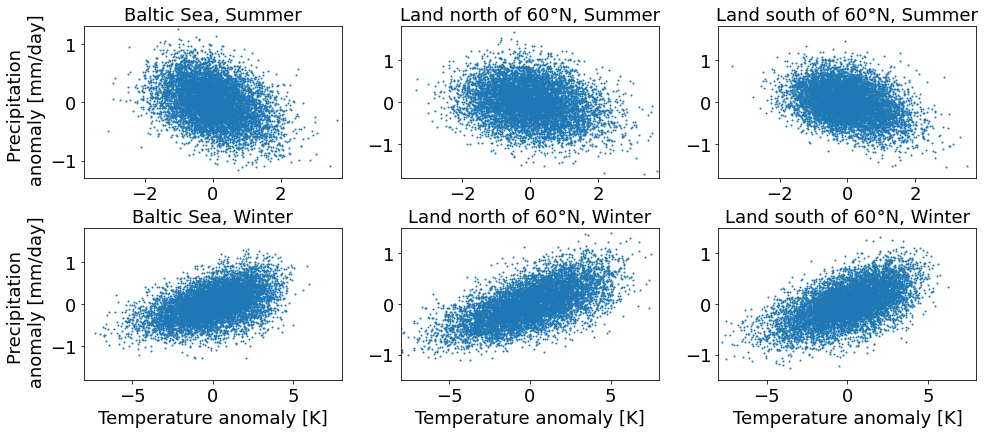

In [105]:
fig, axs = plt.subplots(2, 3, figsize=(16,6.5))
fig.subplots_adjust(hspace=0.33, wspace=0.23)

axs[0,0].plot(summer_mean_temp_bs, summer_mean_prec_bs, '.', markersize=2)        
#axs[0,0].set_xlabel('Temperature anomaly [K]', fontsize='18')
axs[0,0].set_ylabel('Precipitation \n anomaly [mm/day]', fontsize='18')
axs[0,0].tick_params(axis='both', which='major', labelsize=18)
axs[0,0].set_xlim([-3.8, 3.8])
axs[0,0].set_ylim([-1.3, 1.3])
axs[0,0].set_title('Baltic Sea, Summer', fontsize='18')                    

axs[0,1].plot(summer_mean_temp_ln, summer_mean_prec_ln, '.', markersize=2)        
#axs[0,1].set_xlabel('Temperature anomaly [K]', fontsize='18')
#axs[0,1].set_ylabel('Precipitation \n anomaly [mm/day]', fontsize='18')
axs[0,1].tick_params(axis='both', which='major', labelsize=18)
axs[0,1].set_xlim([-3.8, 3.8])
axs[0,1].set_ylim([-1.8, 1.8])
axs[0,1].set_title('Land north of 60°N, Summer', fontsize='18')                    

axs[0,2].plot(summer_mean_temp_ls, summer_mean_prec_ls, '.', markersize=2)        
#axs[0,2].set_xlabel('Temperature anomaly [K]', fontsize='18')
#axs[0,2].set_ylabel('Precipitation \n anomaly [mm/day]', fontsize='18')
axs[0,2].tick_params(axis='both', which='major', labelsize=18)
axs[0,2].set_xlim([-3.8, 3.8])
axs[0,2].set_ylim([-1.8, 1.8])
axs[0,2].set_title('Land south of 60°N, Summer', fontsize='18')                    

axs[1,0].plot(winter_mean_temp_bs, winter_mean_prec_bs, '.', markersize=2)        
axs[1,0].set_xlabel('Temperature anomaly [K]', fontsize='18')
axs[1,0].set_ylabel('Precipitation \n anomaly [mm/day]', fontsize='18')
axs[1,0].tick_params(axis='both', which='major', labelsize=18)
axs[1,0].set_xlim([-8, 8])
axs[1,0].set_ylim([-1.8, 1.8])
axs[1,0].set_title('Baltic Sea, Winter', fontsize='18')                    

axs[1,1].plot(winter_mean_temp_ln, winter_mean_prec_ln, '.', markersize=2)        
axs[1,1].set_xlabel('Temperature anomaly [K]', fontsize='18')
#axs[1,1].set_ylabel('Precipitation anomaly \n [mm/day]', fontsize='18')
axs[1,1].tick_params(axis='both', which='major', labelsize=18)
axs[1,1].set_xlim([-8, 8])
axs[1,1].set_ylim([-1.5, 1.5])
axs[1,1].set_title('Land north of 60°N, Winter', fontsize='18')                    

axs[1,2].plot(winter_mean_temp_ls, winter_mean_prec_ls, '.', markersize=2)        
axs[1,2].set_xlabel('Temperature anomaly [K]', fontsize='18')
#axs[1,2].set_ylabel('Precipitation anomaly \n [mm/day]', fontsize='18')
axs[1,2].tick_params(axis='both', which='major', labelsize=18)
axs[1,2].set_xlim([-8, 8])
axs[1,2].set_ylim([-1.5, 1.5])
axs[1,2].set_title('Land south of 60°N, Winter', fontsize='18');         

plt.savefig("/students_files/marti/plots/res_08_scatter_temppreccorr_3map", bbox_inches='tight');